<a href="https://colab.research.google.com/github/satishsalyal/neuralnetwork/blob/master/New_Train_yolov8_Intestinal_Protozoa_detection_from_microscopic_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOV8 Intestinal Protozoa Detection**
This notebook explains training custom YOLOv8 model for  Intestinal Protozoa Detection. I am using "Chula-ParasiteEgg-11 Dataset" from IEEDataPort . https://ieee-dataport.org/competitions/ parasitic-egg-detection-and-classification-microscopic-images

This is a initial version of custom trianing with YOLOv8. Currently YOLOv8 is the newest state-of-the-art YOLO model that can be used for object detection, image classification, and instance segmentation tasks.

I am using Google Colab for trianing. If you are intrested to check custom trianing with YOLOv8, please follow this link 😀 https://github.com/satishsalyal/neuralnetwork

## How to Train YOLOv8 to Detect Intestinal parasites from microscopic images

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection  model developed by Ultralytics. 
 -  designed to be fast, accurate, and easy to use
 -  an excellent choice for a wide range of object detection tasks.    
 -  trained on large datasets
 -  capable of running on a variety of hardware platforms, from CPUs to GPUs.


## Pro Tip: Before Running the Script Please Make Sure you Select the Run Time as GPU

If you are running this notebook in Google Colab, navigate to 
 - `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. 
 -This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Setting Up Google Colab
- YOLOV8 Installation
- Mounting Google Drive
- Create Intestinal_Protozoa_Detetcion.yaml (dataset config file)
- Training Our Custom Intestinal Protozoa Detetcion Model
- Validate Custom Model
- Metrics
- Inference with Custom Model

**Let's begin!**

## 1. Setting Up Google Colab
Google Colab is an online environment similar to Jupiter notebook where you can train deep learning models on GPU/TPU. The free plan of Google Colab allows you to train the deep learning model for up to 12 hrs before the runtime disconnects. By visiting the runtime section change run type to GPU.

In [8]:
# to check and monitoring of NVIDIA GPU devices. 
!nvidia-smi 

Thu Apr 13 09:23:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. YOLOV8 Installation:
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.

In [12]:
# installing package to work with yolov8
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.6/509.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 25.4 MB/s eta 0:00:00


## 3. Mounting Google Drive
I have uploaded **Intestinal_Protoza folder** to Google drive in the 'MyDrive/datasets/intestial_Protozoa/' path, I will mount drive using the below code. (It will ask you to enter the authorization code that you can by clicking the link that will appear below). The annotated data has been divided in such a way that the images and the labels (text files) are separate.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/deepIPS.zip'

ls: cannot access '/content/drive/MyDrive/deepIPS.zip': No such file or directory


##      Unzipped the Dataset

In [10]:
!unzip -u  /content/drive/MyDrive/deepIPS.zip

Streaming output truncated to the last 5000 lines.
  inflating: deepIPS/train/labels/Taenia-spp-egg_0981_jpg.rf.699da1379909868697f8c97d74d14367.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0982_jpg.rf.c9e7a415beead223fda5135852fd7f8a.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0983_jpg.rf.4a6df5790b797b29202c4c44cc678964.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0986_jpg.rf.f9a52389992e86a37ccb1526f4a5c31d.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0988_jpg.rf.06e4cff3baf0e8908016a35662e6acb5.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0989_jpg.rf.9a955602c15f081d7e35e7163b6db1be.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0990_jpg.rf.f1a9c5377fa02b8736c5047ee9ebccdf.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0992_jpg.rf.e7156adfed102a08175acaae8c3908ed.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_0994_jpg.rf.1eb0ba4e2dba54e1fcc6998ba08a0879.txt  
  inflating: deepIPS/train/labels/Taenia-spp-egg_

## YOLOV8 format:
The format for Yolov8 is same as Yolov5. The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [11]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/deepIPS/train/images/Ascaris-lumbricoides_0001_jpg.rf.dda614c5905ef9890b25393cbce1aff0.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/deepIPS/valid/images/Enterobius-vermicularis_0250_jpg.rf.a1cb9baee28f499f00711193c1194ee3.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 640, 640
shape of the validation image 640, 640


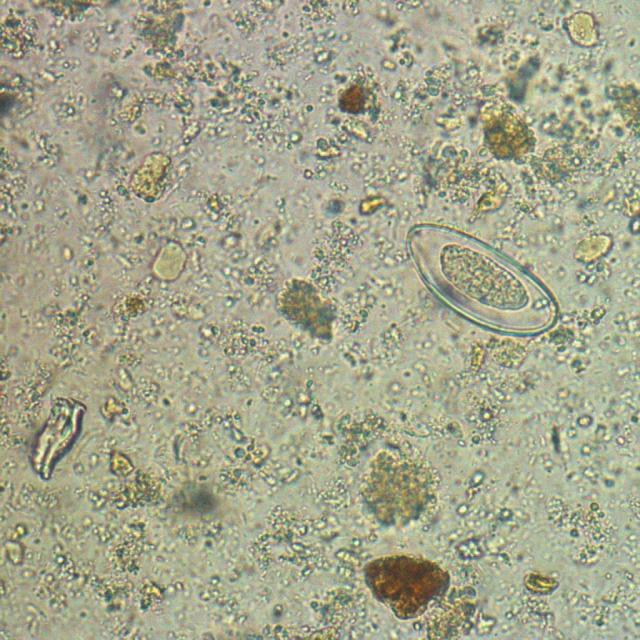

In [ ]:
# dispying with different width
from IPython.display import Image 
Image(filename='/content/deepIPS/valid/images/Enterobius-vermicularis_0250_jpg.rf.a1cb9baee28f499f00711193c1194ee3.jpg', width=640) 

## 4. Create Intestinal_Protozoa_Detetcion.yaml (dataset config file)
"Inteasinal Protozoa Detectin" is having the images are split as follows: Train: 990 = 70% Valid: 294 = 20% Test: 136 =10% (I am not using test datatset, instaed i will test with soem video from the internet) Total = 1420 images

mask_dataset/face_mask_detetcion.yaml, created below, is the dataset config file that defines:

the dataset root directory path and relative paths to train / val / test image directories (or *.txt files with image paths)

nc: the number of classes

names: a list of class names

## 5. Training Our Custom Intestinal Protozoa-detection-from-microscopic-images:
I am using a YOLOv8m pretrained model for custom training with my dataset.

Parameters:

 - specify the path to the data configuration file
 - specify a path to weights to start transfer learning from. yolov8m.pt (starting from Pretrained weights)
 - input image size
 - Size of a batch (model weights are updated with each batch).
 - No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk

In [11]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8l.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/deepIPS/coco128.yaml", epochs=20, imgsz=640)  # train the model

Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/deepIPS/coco128.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

## 6 Validation:
Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [1]:
results = model.val()  # evaluate model performance on the validation set

NameError: ignored

## 7 Metrics: Evaluate Custom YOLOv8 Detector Performance
The trainig mAP per class and over all is good and testing results on video are also good. If we train for epochs, adding more data and playing with hyperparameters can improve performance of the model.

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train2/F1_curve.png') 
y = Image(filename='runs/detect/train2/PR_curve.png') 
z = Image(filename='runs/detect/train2/confusion_matrix.png') 
display(x, y,z)

In [ ]:
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/runs/detect/train2/train_batch0.jpg', width=600)

In [ ]:
!python val.py --weights /content/runs/detect/train2/weights/best.pt  --data coco128.yaml --img 416 

In [ ]:
print("Validation Label DATA:")
Image(filename='/content/runs/detect/train2/train_batch0.jpg', width=900)

In [ ]:
print("Validation Prediction DATA:")
Image(filename='/content/yolov5/runs/val/exp2/val_batch0_pred.jpg', width=900)

In [ ]:
%cd /content/yolov5/
!python detect.py --weights /content/runs/detect/train2/weights/best.pt --img 416 --conf 0.4 --source ../valid/images

## 8 Inference:

In [ ]:
# checking the latest trained files
!ls 'runs/detect/train2/weights'

In [ ]:

# loading the trianed model
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model

In [ ]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 
!yolo task=detect mode=predict model="runs/detect/train2/weights/best.pt" source="/content/drive/MyDrive/datasets/Intestinal_Protozoa/mask_testing.mp4"

Conclusion:
Based on the inference results, the trained model is doing a great job. We can still imrpove it by using large yolov8 models, additional data and hyperparameter changes.

Export Trained Weights for Future Inference
Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
%cp -r /content/yolov5/runs/train/exp /content/drive/MyDrive

In [ ]:
!zip -r /content/runs.zip /content/runs

In [ ]:
from google.colab import files
files.download('/content/runs.zip')

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")